In [88]:
import numpy
import pandas
import seaborn
import matplotlib.pyplot as plt

In [89]:
data = pandas.read_csv('metrics_compare.csv')

In [90]:
data.groupby('attack_type').mean()

#Normalize the data (audio_distance and similarity)
data['audio_distance'] = data['audio_distance'] / data['audio_distance'].max()
data['similarity'] = data['similarity'] / data['similarity'].max()
data['dissimilarity'] = 1 - data['similarity']
data['audio_likeness'] = 1 - data['audio_distance']

In [91]:
data = data.melt(id_vars=['attack_type'], value_vars=['audio_likeness', 'dissimilarity', 'success'])


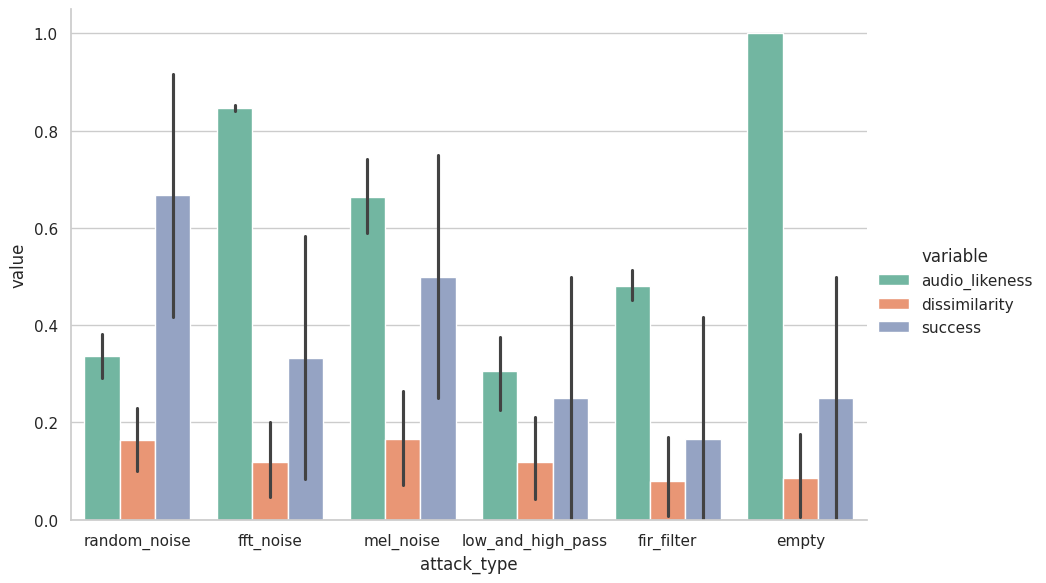

In [92]:
seaborn.set(style='whitegrid')
seaborn.set_palette('Set2')
seaborn.catplot(x='attack_type', y='value', hue='variable', data=data, kind='bar', height=6, aspect=1.5)